# Superdense Coding
This is a communication protocol that allows two bits of classical information to be sent using just one qubit, leveraging the entanglement between Alice and Bob. It requires them to share an entangled pair beforehand and use quantum operations to encode the extra information.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [13]:
# Step 1: Create a 2-qubit Quantum Circuit
qsd = QuantumCircuit(2)

# Step 2: Entangle the qubits
# Sheldon prepares the entangled qubits
qsd.h(0)          # Apply a Hadamard gate on qubit 0
qsd.cx(0, 1)      # Apply a CNOT gate with qubit 0 as control and qubit 1 as target

# Step 3: Encode the message (Sheldon encodes '10' as an example)
# Sheldon applies the required gate to encode the message
qsd.x(0)          # Apply X gate on qubit 0 to encode the message '10'

# Step 4: Send qubit 0 to Leonard (conceptual step, no operation needed in code)

# Step 5: Decode the message
# Leonard applies gates to decode the message
qsd.cx(0, 1)      # Apply CNOT gate with qubit 0 as control and qubit 1 as target
qsd.h(0)          # Apply Hadamard gate on qubit 0

# Step 6: Measure both qubits
qsd.measure_all()

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qsd, simulator)
result = simulator.run(compiled_circuit).result()

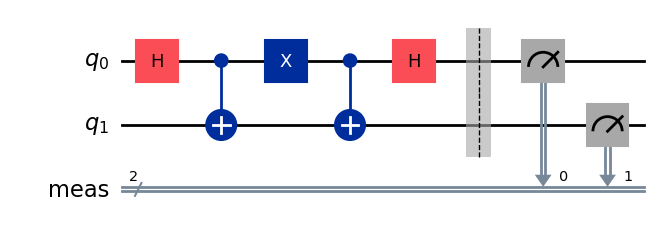

In [14]:
# Draw the circuit
qsd.draw('mpl')

Message decoded by Leonard (measurement results): {'10': 1024}


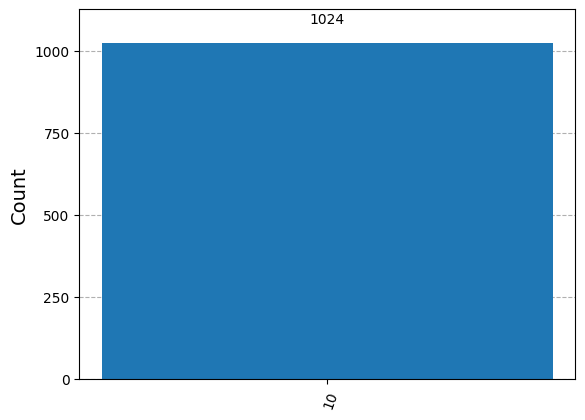

In [15]:
# Get and display the results
counts = result.get_counts()
print("Message decoded by Leonard (measurement results):", counts)

#Visualisation
plot_histogram(counts)